# Hierarchical Clustering(column profiling) and DBScan

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [31]:
df_stocks = pd.read_csv('Stocks.csv', index_col=0)
# The index_col parameter is used to specify which column from the CSV file should be used 
# as the index for the DataFrame

In [32]:
df_stocks.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1657751076864,12901505,-0.179,180.288,159007899648,0.00000,0.28442,-0.207,-16.891368
ASIANPAINT,3167850856448,933762,0.789,143.991,319870205952,0.00000,0.10876,0.788,-3.813726
AXISBANK,2221430013952,6403035,0.859,400.581,433654104064,0.01474,0.37225,0.855,-43.305372
BAJAJ-AUTO,996960239616,442625,-0.006,1033.043,348966289408,0.00000,0.17649,-0.007,-0.566448
BAJFINANCE,4343084089344,819955,1.590,724.584,202325999616,0.00000,0.42614,1.586,-34.809406


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_stocks)
X_stock = scaler.transform(df_stocks)

In [34]:
scaled_df = pd.DataFrame(X_stock, columns=df_stocks.columns, index=df_stocks.index)

### scipy implementation

In [35]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df, metric='euclidean', method='ward')

Text(0, 0.5, 'distance')

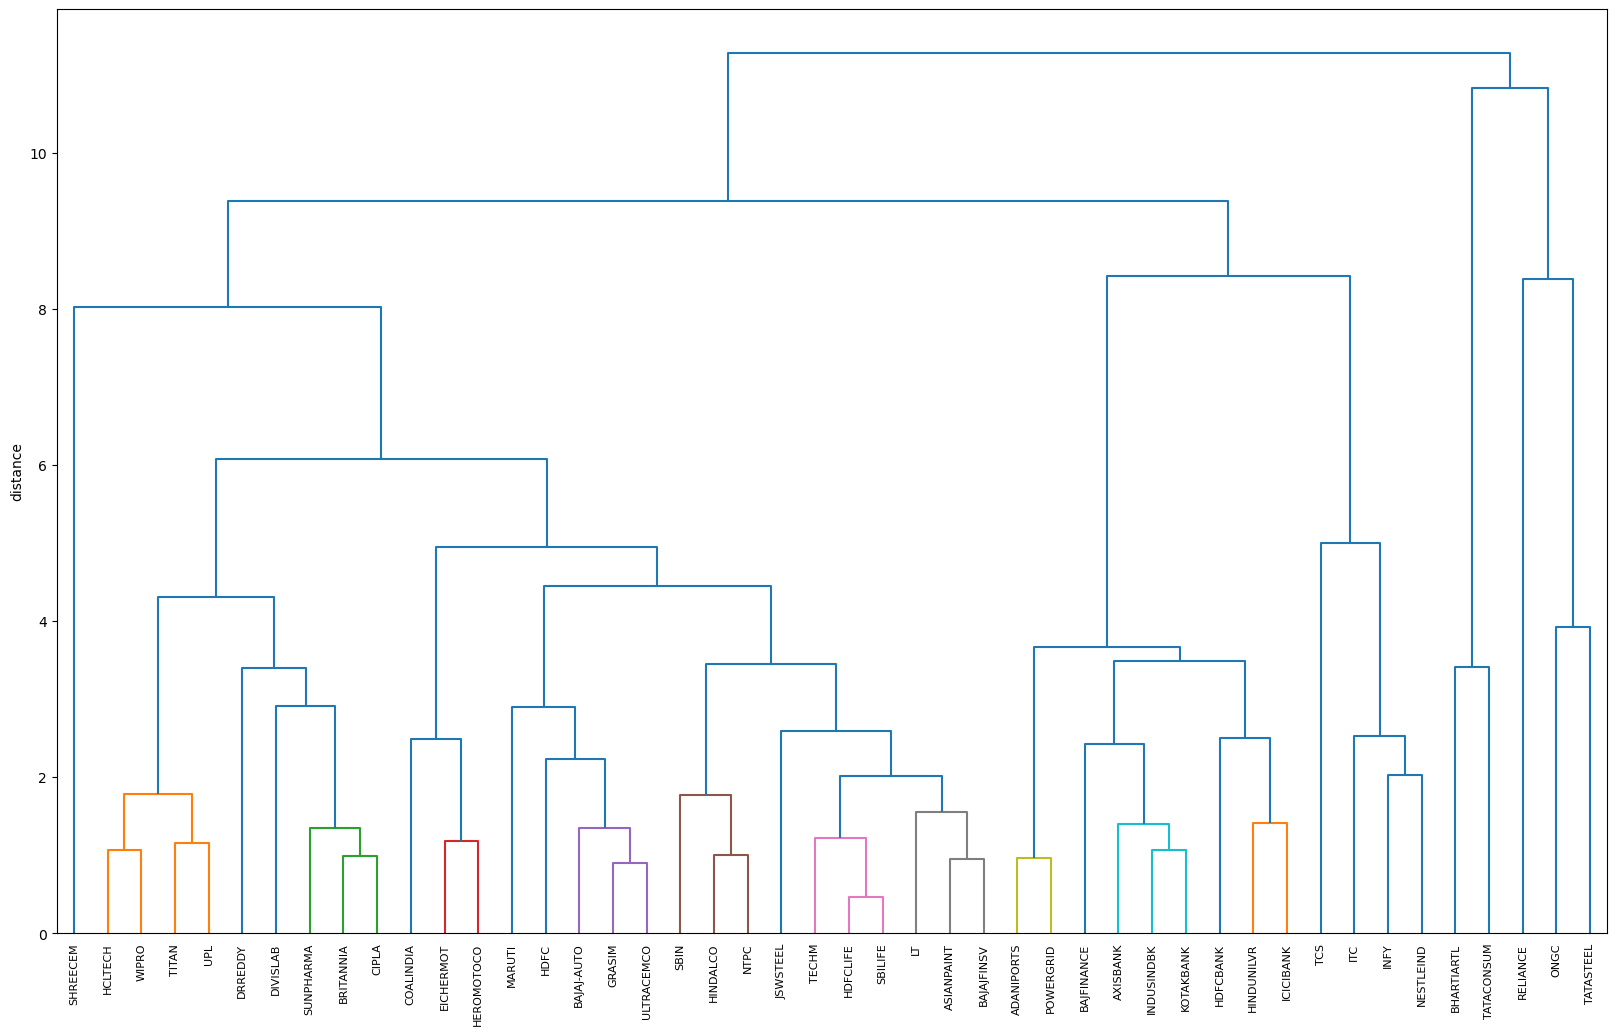

In [36]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

### sklearn implementation

In [66]:
from sklearn.cluster import AgglomerativeClustering
## Sklearn implementation of Hierarchical clustering

# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

In [38]:
y_pred 

array([4, 1, 4, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4,
       3, 4, 3, 1, 4, 1, 1, 1, 3, 0, 4, 0, 1, 1, 1, 1, 3, 2, 0, 1, 1, 1,
       1, 1], dtype=int64)

##### Cluster profiling
The business don't care about of the technicalities. They'll ask you if you could tell them the difference between each of these clusters.

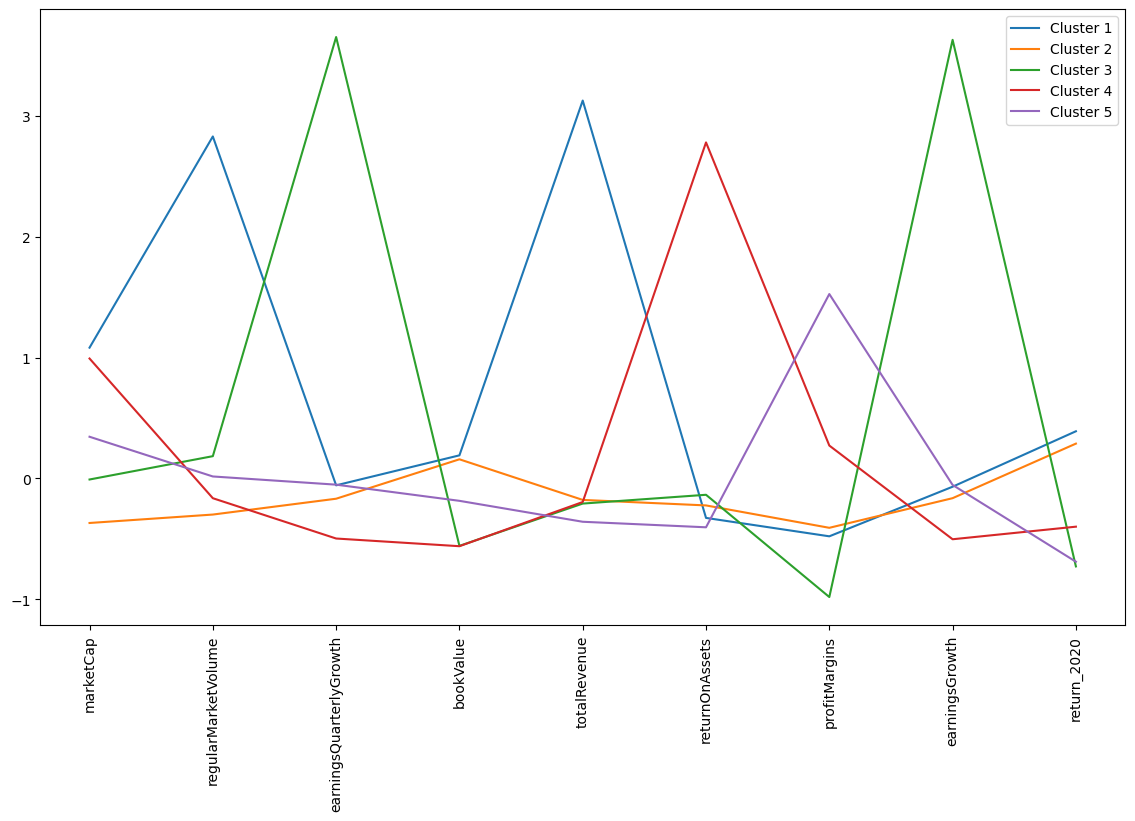

In [39]:
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

- If you see **cluster 5**, their market cap is very small, everything is small but profitMargins are high. This type of group of companies is very interesting for a risky invester.
- Since it's a small cap, there's risk associated with it but their profit margins are better than clusters.
- If you look at **cluster 3**, their earningsQuarterlyGrowth is great, but their profit margin is the least.
- This could be, say for an oil company, which are generally good but sometimes due to the fluctuations of crude oil prices, maybe when we collected this data, their profit margins were very low. But, still they have good books numbers which says their quarterly growth is high, their earnings growth is high. Maybe they are offsetting some of their previous quarter's losses into this.

In [40]:
scaled_df.groupby('label').mean()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
label,,,,,,,,,
0,1.082725,2.830613,-0.056672,0.191481,3.127719,-0.326267,-0.478593,-0.068138,0.390761
1,-0.368259,-0.298530,-0.167482,0.158829,-0.177350,-0.222899,-0.408219,-0.162960,0.288530
2,-0.008409,0.184712,3.653540,-0.557731,-0.207662,-0.134875,-0.981070,3.630304,-0.727780
3,0.992836,-0.163224,-0.496853,-0.560478,-0.194661,2.781354,0.272511,-0.502929,-0.398818
4,0.345396,0.016720,-0.051127,-0.184921,-0.358155,-0.403966,1.526444,-0.053512,-0.688922


In [41]:
scaled_df.groupby('label').mean().T

label,0,1,2,3,4
marketCap,1.082725,-0.368259,-0.008409,0.992836,0.345396
regularMarketVolume,2.830613,-0.298530,0.184712,-0.163224,0.016720
earningsQuarterlyGrowth,-0.056672,-0.167482,3.653540,-0.496853,-0.051127
bookValue,0.191481,0.158829,-0.557731,-0.560478,-0.184921
totalRevenue,3.127719,-0.177350,-0.207662,-0.194661,-0.358155
returnOnAssets,-0.326267,-0.222899,-0.134875,2.781354,-0.403966
profitMargins,-0.478593,-0.408219,-0.981070,0.272511,1.526444
earningsGrowth,-0.068138,-0.162960,3.630304,-0.502929,-0.053512
return_2020,0.390761,0.288530,-0.727780,-0.398818,-0.688922


In [42]:
pd.Series(y_pred, index=scaled_df.index)

ADANIPORTS    4
ASIANPAINT    1
AXISBANK      4
BAJAJ-AUTO    1
BAJFINANCE    4
BAJAJFINSV    1
BHARTIARTL    2
BRITANNIA     1
CIPLA         1
COALINDIA     1
DIVISLAB      1
DRREDDY       1
EICHERMOT     1
GRASIM        1
HCLTECH       1
HDFCBANK      4
HDFCLIFE      1
HEROMOTOCO    1
HINDALCO      1
HINDUNILVR    4
HDFC          1
ICICIBANK     4
ITC           3
INDUSINDBK    4
INFY          3
JSWSTEEL      1
KOTAKBANK     4
LT            1
MARUTI        1
NTPC          1
NESTLEIND     3
ONGC          0
POWERGRID     4
RELIANCE      0
SBILIFE       1
SHREECEM      1
SBIN          1
SUNPHARMA     1
TCS           3
TATACONSUM    2
TATASTEEL     0
TECHM         1
TITAN         1
UPL           1
ULTRACEMCO    1
WIPRO         1
dtype: int64

# DBScan

In [44]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [45]:
X = df.copy()
X.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [46]:
X = X.drop("ID", axis = 1 )

In [47]:
cols = X.columns

In [48]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [49]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [59]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 0.10, min_samples = 5).fit(X)

clusters = pd.DataFrame(X, columns=cols)
clusters['dbsc'] = dbsc.labels_

clusters['dbsc'].unique()

array([-1,  0, 11, 20,  8,  1,  9, 15,  2, 12, 21,  7,  3,  4,  5, 16,  6,
       14, 13, 18, 10, 19, 17], dtype=int64)

In [61]:
clusters['dbsc'].value_counts()

-1     1867
 0      472
 1       41
 6       13
 10       8
 16       8
 20       7
 15       7
 14       6
 7        6
 21       5
 12       5
 3        5
 4        5
 5        5
 2        5
 9        5
 8        5
 13       5
 18       5
 11       5
 19       5
 17       5
Name: dbsc, dtype: int64

##### Trying again with min_samples = 15

In [62]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 0.10, min_samples = 15).fit(X)

clusters = pd.DataFrame(X, columns=cols)
clusters['dbsc'] = dbsc.labels_

clusters['dbsc'].unique()

array([-1,  0], dtype=int64)

In [63]:
clusters['dbsc'].value_counts()
# -1 is for outliers since data is very clumsy.

-1    2430
 0      70
Name: dbsc, dtype: int64

When you increase min_samples, it becomes more difficult for points to qualify as core points, as they need to have a larger number of neighbors within the eps distance. As a result, points that do not meet this criterion may be considered outliers rather than forming their own clusters.

So, with min_samples = 15, you would likely get fewer clusters compared to a smaller min_samples value, as more points would be considered outliers due to the higher requirement for core point status.

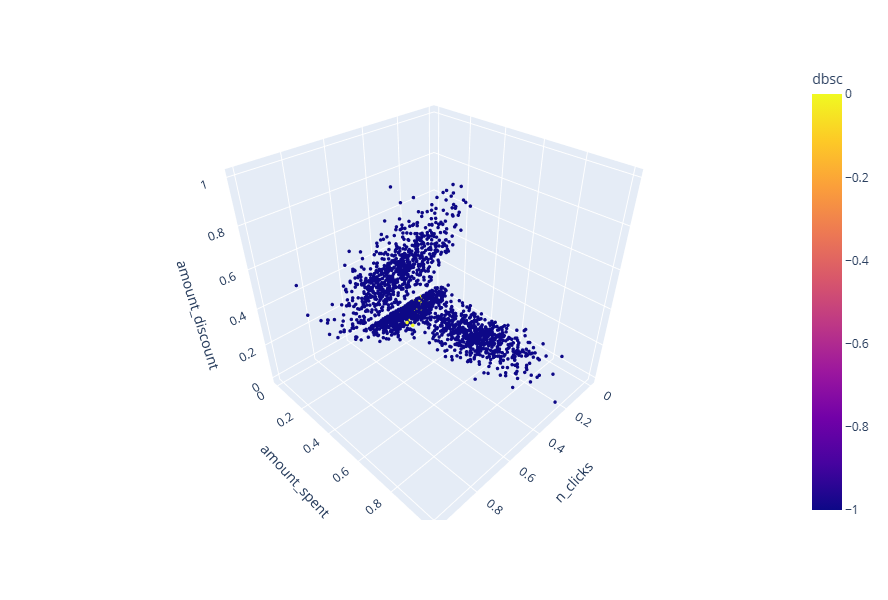

In [64]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='dbsc', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

**If you have any questions, connect with me:<br>**
[Let's Connect](https://linktr.ee/khushalkumar31)